## Imports

In [65]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [66]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [67]:
df = pd.read_csv('gi_all_psm_open.csv')

In [68]:
df.shape

(39298, 37)

In [69]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            1              1             1        1    1   7.501667   
1            0              0             0        0    0  16.273611   
2            0              0             0        0    0  23.962500   
3            0              0             0        0    0   7.340278   
4            0              0             0        0    0  10.945139   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
0                 0                 0.0                  74  51.0    M  White   
1                 0                 1.0                  64  74.0    M  White   
2                 0                 1.0                  50   1.0    M  White   
3                 0                 0.0                  83  83.0    M  Black   
4                 0                 0.0                  79   NaN  NaN    NaN   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  1                   1        1            NaN   
1    5                  0                   0        1            NaN   
2    0                  1                   0        1            NaN   
3    4                  0                   0        1            NaN   
4    0                  0                   0        0            3.7   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
1                      Unknown             NaN        NaN   
2                      Unknown             NaN        NaN   
3                      Unknown             NaN        NaN   
4                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown       0.80                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            1     8                0          0   47.010980   
1           1.0            0     1                1          0         NaN   
2           1.0            0     6                0          0  219.920238   
3           0.0            1     6                0          0         NaN   
4           1.0            0     5                0          0  119.872691   

  eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0      Kidney Disease    0      13.5                  >= 9.0        1  
1                 NaN    0       NaN                 Unknown        1  
2              Normal    0      12.9                  >= 9.0        1  
3                 NaN    1       9.0                  >= 9.0        1  
4              Normal    0      14.4                  >= 9.0        1

In [70]:
df = df[df['non_elective'] == 1]

In [71]:
df.shape

(31348, 37)

In [72]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   
5  055c909b-ccb7-4ec5-8526-687661a865c1  4e35bdd1-8b3b-458c-8efc-c47201b66049   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            1              1             1        1    1   7.501667   
1            0              0             0        0    0  16.273611   
2            0              0             0        0    0  23.962500   
4            0              0             0        0    0  10.945139   
5            0              0             0        0    0   9.743750   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
0                 0                 0.0                  74  51.0    M  White   
1                 0                 1.0                  64  74.0    M  White   
2                 0                 1.0                  50   1.0    M  White   
4                 0                 0.0                  79   NaN  NaN    NaN   
5                 0                 0.0                  76  48.0    M  White   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  1                   1        1            NaN   
1    5                  0                   0        1            NaN   
2    0                  1                   0        1            NaN   
4    0                  0                   0        0            3.7   
5    2                  0                   0        1            3.9   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
1                      Unknown             NaN        NaN   
2                      Unknown             NaN        NaN   
4                       Normal             NaN        NaN   
5                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
4                  Unknown       0.80                   Normal            0   
5                  Unknown       0.60                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            1     8                0          0   47.010980   
1           1.0            0     1                1          0         NaN   
2           1.0            0     6                0          0  219.920238   
4           1.0            0     5                0          0  119.872691   
5           1.0            0     6                1          0  118.893072   

  eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0      Kidney Disease    0      13.5                  >= 9.0        1  
1                 NaN    0       NaN                 Unknown        1  
2              Normal    0      12.9                  >= 9.0        1  
4              Normal    0      14.4                  >= 9.0        1  
5              Normal    1      13.9                  >= 9.0        1

In [73]:
df.columns

Index(['personid', 'encounterid', 'pre_albumin', 'early_albumin',
       'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI',
       'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin',
       'preop_albumin_classification', 'postop_albumin', 'preop_inr',
       'preop_inr_classification', 'preop_scr', 'preop_scr_classification',
       'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension',
       'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb',
       'preop_hb_classification', 'open_pr'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31348 entries, 0 to 39297
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      31348 non-null  object 
 1   encounterid                   31348 non-null  object 
 2   pre_albumin                   31348 non-null  int64  
 3   early_albumin                 31348 non-null  int64  
 4   late_albumin                  31348 non-null  int64  
 5   albumin                       31348 non-null  int64  
 6   ICU                           31348 non-null  int64  
 7   LOS_days                      31348 non-null  float64
 8   90_day_mortality              31348 non-null  int64  
 9   90_day_readmission            27696 non-null  float64
 10  hospital_free_days            31348 non-null  int64  
 11  age                           30832 non-null  float64
 12  sex                           30811 non-null  object 
 13  r

In [75]:
df.isnull().sum()

personid                            0
encounterid                         0
pre_albumin                         0
early_albumin                       0
late_albumin                        0
albumin                             0
ICU                                 0
LOS_days                            0
90_day_mortality                    0
90_day_readmission               3652
hospital_free_days                  0
age                               516
sex                               537
race                             2125
CCI                                 0
preop_hypotension                   0
postop_hypotension                  0
MAKE_90                             0
preop_albumin                   19139
preop_albumin_classification        0
postop_albumin                  25179
preop_inr                       30833
preop_inr_classification            0
preop_scr                        6409
preop_scr_classification            0
transfusion                         0
non_elective

In [76]:
df.early_albumin.value_counts()

0    29807
1     1541
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [77]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    1541.000000
mean       21.065291
std        29.485632
min         0.111111
25%         7.763194
50%        13.906944
75%        24.473611
max       532.831250
Name: LOS_days, dtype: float64

In [78]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    29807.000000
mean        17.167474
std         22.512207
min          0.086111
25%          7.732292
50%         11.853472
75%         18.963194
max        742.281944
Name: LOS_days, dtype: float64

In [150]:
df[df['albumin'] == 1].CCI.describe()

count    11453.000000
mean         2.955907
std          2.818139
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         16.000000
Name: CCI, dtype: float64

In [151]:
df[df['albumin'] == 0].CCI.describe()

count    19379.000000
mean         2.120749
std          2.556306
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         17.000000
Name: CCI, dtype: float64

In [79]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    1174
1     367
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 23.815704088254382


In [80]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    26522
1     3285
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 11.020901130606903


In [81]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

0.0    738
1.0    436
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 37.13798977853492


In [82]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    16563
1.0     9959
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 37.54995852499812


In [83]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   
5  055c909b-ccb7-4ec5-8526-687661a865c1  4e35bdd1-8b3b-458c-8efc-c47201b66049   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            1              1             1        1    1   7.501667   
1            0              0             0        0    0  16.273611   
2            0              0             0        0    0  23.962500   
4            0              0             0        0    0  10.945139   
5            0              0             0        0    0   9.743750   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
0                 0                 0.0                  74  51.0    M  White   
1                 0                 1.0                  64  74.0    M  White   
2                 0                 1.0                  50   1.0    M  White   
4                 0                 0.0                  79   NaN  NaN    NaN   
5                 0                 0.0                  76  48.0    M  White   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  1                   1        1            NaN   
1    5                  0                   0        1            NaN   
2    0                  1                   0        1            NaN   
4    0                  0                   0        0            3.7   
5    2                  0                   0        1            3.9   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
1                      Unknown             NaN        NaN   
2                      Unknown             NaN        NaN   
4                       Normal             NaN        NaN   
5                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
4                  Unknown       0.80                   Normal            0   
5                  Unknown       0.60                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            1     8                0          0   47.010980   
1           1.0            0     1                1          0         NaN   
2           1.0            0     6                0          0  219.920238   
4           1.0            0     5                0          0  119.872691   
5           1.0            0     6                1          0  118.893072   

  eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0      Kidney Disease    0      13.5                  >= 9.0        1  
1                 NaN    0       NaN                 Unknown        1  
2              Normal    0      12.9                  >= 9.0        1  
4              Normal    0      14.4                  >= 9.0        1  
5              Normal    1      13.9                  >= 9.0        1

In [84]:
print(df.columns.tolist())

['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [85]:
df_a24 = df[['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']]

In [87]:
df_a24.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   
5  055c909b-ccb7-4ec5-8526-687661a865c1  4e35bdd1-8b3b-458c-8efc-c47201b66049   

   pre_albumin  early_albumin  late_albumin  ICU   LOS_days  90_day_mortality  \
0            1              1             1    1   7.501667                 0   
1            0              0             0    0  16.273611                 0   
2            0              0             0    0  23.962500                 0   
4            0              0             0    0  10.945139                 0   
5            0              0             0    0   9.743750                 0   

   90_day_readmission  hospital_free_days  vasopressor  sex   race  \
0                 0.0                  74            1    M  White   
1                 1.0                  64            0    M  White   
2                 1.0                  50            0    M  White   
4                 0.0                  79            0  NaN    NaN   
5                 0.0                  76            0    M  White   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
0                   1        1            NaN                      Unknown   
1                   0        1            NaN                      Unknown   
2                   0        1            NaN                      Unknown   
4                   0        0            3.7                       Normal   
5                   0        1            3.9                       Normal   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
0             NaN        NaN                  Unknown       1.66   
1             NaN        NaN                  Unknown        NaN   
2             NaN        NaN                  Unknown        NaN   
4             NaN        NaN                  Unknown       0.80   
5             NaN        NaN                  Unknown       0.60   

  preop_scr_classification  transfusion  non_elective        eGFR  \
0                     High            0           1.0   47.010980   
1                  Unknown            0           1.0         NaN   
2                  Unknown            0           1.0  219.920238   
4                   Normal            0           1.0  119.872691   
5                   Normal            0           1.0  118.893072   

  eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0      Kidney Disease    0      13.5                  >= 9.0        1  
1                 NaN    0       NaN                 Unknown        1  
2              Normal    0      12.9                  >= 9.0        1  
4              Normal    0      14.4                  >= 9.0        1  
5              Normal    1      13.9                  >= 9.0        1

In [88]:
# remove vasopressor variable - it is an outcome

df.drop(columns=['personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr'], inplace=True)

In [89]:
df.shape

(31348, 8)

In [90]:
df.head()

encounterid  albumin   age  CCI  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e        1  51.0    0   
1  29013b3b-a508-4d8e-b5ed-b0c02408ede9        0  74.0    5   
2  aed18cec-c00c-4a6d-8706-c1c21c970100        0   1.0    0   
4  7e1dfe1e-d039-4e4e-9040-acb6218e90a0        0   NaN    0   
5  4e35bdd1-8b3b-458c-8efc-c47201b66049        0  48.0    2   

   preop_hypotension  NEWS  bl_hypertension  preop_MAP  
0                  1     8                0          0  
1                  0     1                1          0  
2                  1     6                0          0  
4                  0     5                0          0  
5                  0     6                1          0

In [91]:
df.isnull().sum()

encounterid            0
albumin                0
age                  516
CCI                    0
preop_hypotension      0
NEWS                   0
bl_hypertension        0
preop_MAP              0
dtype: int64

In [92]:
df.dropna(inplace=True)

In [93]:
df.shape

(30832, 8)

In [94]:
df.albumin.value_counts()

0    19379
1    11453
Name: albumin, dtype: int64

In [95]:
df.head()

encounterid  albumin   age  CCI  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e        1  51.0    0   
1  29013b3b-a508-4d8e-b5ed-b0c02408ede9        0  74.0    5   
2  aed18cec-c00c-4a6d-8706-c1c21c970100        0   1.0    0   
5  4e35bdd1-8b3b-458c-8efc-c47201b66049        0  48.0    2   
6  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612        1  71.0    1   

   preop_hypotension  NEWS  bl_hypertension  preop_MAP  
0                  1     8                0          0  
1                  0     1                1          0  
2                  1     6                0          0  
5                  0     6                1          0  
6                  0     4                0          0

## Initialize PsmPy Class

In [96]:
# adding only non-elective == 1
# adding age variable

psm = PsmPy(df, treatment= 'albumin', indx='encounterid')

In [97]:
%%time
psm.logistic_ps(balance = True)

Wall time: 37.7 s


In [98]:
df_psm = psm.predicted_data

In [99]:
df_psm.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  71.0    1                  0     4   
1  d876535a-c09a-4db1-b3d4-361d3af60734  68.0    0                  0     0   
2  eee3a8aa-e192-4f91-9e60-b0ab5bbd6cf5  81.0    1                  0     0   
3  e4465f48-fbef-4d28-9942-0610abfb0cf6  55.0    2                  0     4   
4  bb5fe0ba-a8ec-429e-aa55-5259943286cc  65.0    2                  1     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                0          0          0.456219         -0.175573        1  
1                0          0          0.293676         -0.877596        1  
2                0          0          0.329034         -0.712556        1  
3                1          0          0.500440          0.001759        1  
4                1          0          0.553053          0.213014        1

## Plot the propensity score / propensity logits

In [100]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 5h 58min 15s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


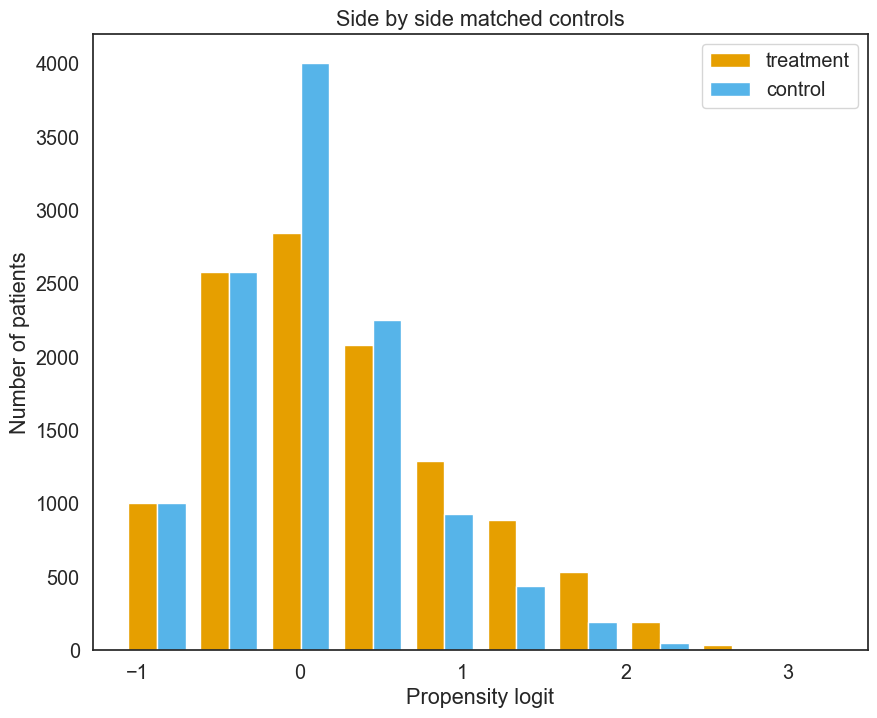

In [101]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

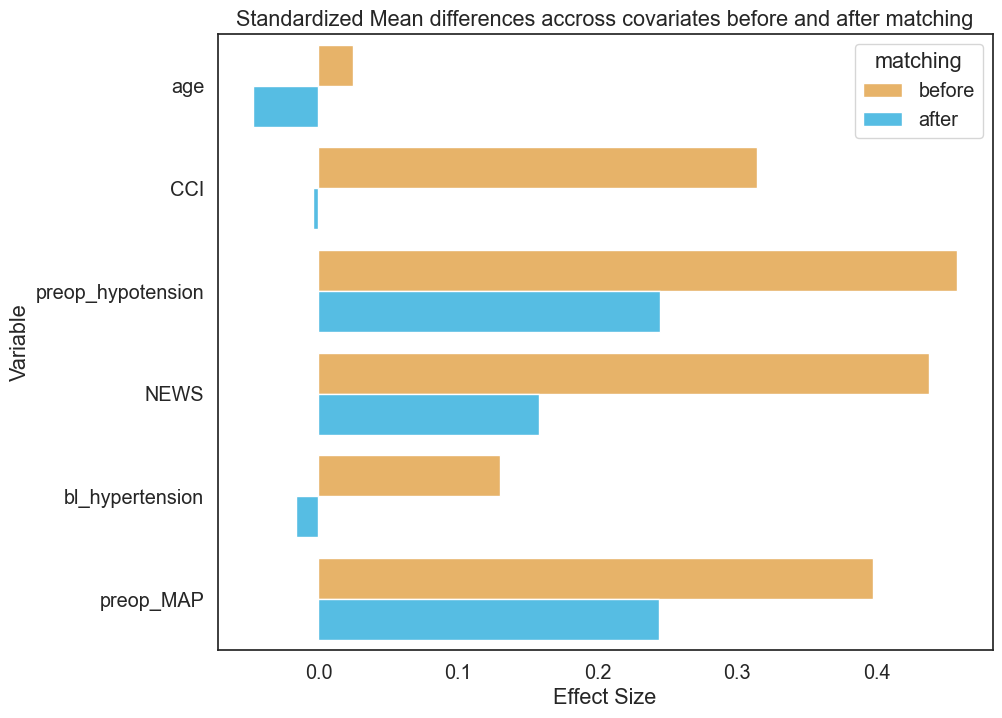

In [102]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [103]:
matched_df = psm.df_matched

In [104]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  71.0    1                  0     4   
1  d876535a-c09a-4db1-b3d4-361d3af60734  68.0    0                  0     0   
2  eee3a8aa-e192-4f91-9e60-b0ab5bbd6cf5  81.0    1                  0     0   
3  e4465f48-fbef-4d28-9942-0610abfb0cf6  55.0    2                  0     4   
4  bb5fe0ba-a8ec-429e-aa55-5259943286cc  65.0    2                  1     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                0          0          0.456219         -0.175573        1  
1                0          0          0.293676         -0.877596        1  
2                0          0          0.329034         -0.712556        1  
3                1          0          0.500440          0.001759        1  
4                1          0          0.553053          0.213014        1

In [105]:
matched_df.shape

(22905, 10)

## Matched Ids

In [106]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  67f5f8b4-d6f7-4ae5-9ded-0320880e3cba
1  d876535a-c09a-4db1-b3d4-361d3af60734  2ada0e59-97c9-4ce2-b329-276aa902354f
2  eee3a8aa-e192-4f91-9e60-b0ab5bbd6cf5  3630a6ad-1f99-4113-a9f6-1adb7911f867
3  e4465f48-fbef-4d28-9942-0610abfb0cf6  1e05f185-3271-4cb5-af47-7db0ce445225
4  bb5fe0ba-a8ec-429e-aa55-5259943286cc  093411e2-1b0d-49a4-a353-cca01d960169

## Effect sizes per variables

In [107]:
psm.effect_size

Variable matching  Effect Size
0                 age   before     0.024698
1                 age    after    -0.047104
2                 CCI   before     0.314373
3                 CCI    after    -0.003914
4   preop_hypotension   before     0.457589
5   preop_hypotension    after     0.244403
6                NEWS   before     0.437517
7                NEWS    after     0.157890
8     bl_hypertension   before     0.129693
9     bl_hypertension    after    -0.016008
10          preop_MAP   before     0.397445
11          preop_MAP    after     0.244021

## Explore Matched df

In [108]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  71.0    1                  0     4   
1  d876535a-c09a-4db1-b3d4-361d3af60734  68.0    0                  0     0   
2  eee3a8aa-e192-4f91-9e60-b0ab5bbd6cf5  81.0    1                  0     0   
3  e4465f48-fbef-4d28-9942-0610abfb0cf6  55.0    2                  0     4   
4  bb5fe0ba-a8ec-429e-aa55-5259943286cc  65.0    2                  1     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                0          0          0.456219         -0.175573        1  
1                0          0          0.293676         -0.877596        1  
2                0          0          0.329034         -0.712556        1  
3                1          0          0.500440          0.001759        1  
4                1          0          0.553053          0.213014        1

In [109]:
matched_df.albumin.value_counts()

1    11453
0    11452
Name: albumin, dtype: int64

In [110]:
matched_df.shape

(22905, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [113]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [114]:
f_df.shape

(22905, 39)

In [115]:
f_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  71.0    1                  0     4   
1  d876535a-c09a-4db1-b3d4-361d3af60734  68.0    0                  0     0   
2  eee3a8aa-e192-4f91-9e60-b0ab5bbd6cf5  81.0    1                  0     0   
3  e4465f48-fbef-4d28-9942-0610abfb0cf6  55.0    2                  0     4   
4  bb5fe0ba-a8ec-429e-aa55-5259943286cc  65.0    2                  1     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  \
0                0          0          0.456219         -0.175573        1   
1                0          0          0.293676         -0.877596        1   
2                0          0          0.329034         -0.712556        1   
3                1          0          0.500440          0.001759        1   
4                1          0          0.553053          0.213014        1   

                               personid  pre_albumin  early_albumin  \
0  05c8fa00-1952-4a70-b50e-af551c2d6e21            1              0   
1  09b1c3e8-45c3-4702-8c30-676bd316e419            0              0   
2  13c382b3-72cc-48c5-8629-f91d1a5c299e            0              0   
3  1ad4dd90-d7bd-4fc9-a7ff-b1352cdf8c01            0              0   
4  1cc9d220-a0c1-4520-8c6e-91b83975ccc5            0              0   

   late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0             0    0   2.987500                 1                 NaN   
1             1    1   5.770833                 0                 0.0   
2             1    1  21.954167                 0                 0.0   
3             1    1  61.112315                 0                 1.0   
4             1    1   8.033333                 0                 0.0   

   hospital_free_days  vasopressor sex     race  postop_hypotension  MAKE_90  \
0                   0            0   M  Unknown                   0        1   
1                  81            0   F    White                   1        0   
2                  68            0   F    White                   0        1   
3                  15            0   F    Black                   1        1   
4                  81            0   M    White                   1        1   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            1.1                          Low             NaN        NaN   
1            NaN                      Unknown             NaN        NaN   
2            NaN                      Unknown             NaN        NaN   
3            NaN                      Unknown             NaN        NaN   
4            5.0                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       4.15                     High            0   
1                  Unknown       0.60                   Normal            0   
2                  Unknown       1.30                   Normal            0   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown       1.48                   Normal            0   

   non_elective       eGFR eGFR_classification  LVR  preop_hb  \
0           1.0  13.491952      Kidney Failure    0       8.9   
1           1.0  93.657224              Normal    0      14.3   
2           1.0  38.443422      Kidney Disease    1      12.0   
3           1.0        NaN                 NaN    0       NaN   
4           1.0  48.950039      Kidney Disease    0      17.0   

  preop_hb_classification  open_pr  
0               8.0 - 8.9        1  
1                  >= 9.0        1  
2                  >= 9.0        1  
3                 Unknown        1  
4                  >= 9.0        1

In [116]:
print(f_df.columns.tolist())

['encounterid', 'age', 'CCI', 'preop_hypotension', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [117]:
f_df.albumin.value_counts()

1    11453
0    11452
Name: albumin, dtype: int64

In [118]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    1537.000000
mean       21.065091
std        29.517196
min         0.111111
25%         7.763194
50%        13.898611
75%        24.473611
max       532.831250
Name: LOS_days, dtype: float64

In [119]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    21368.000000
mean        19.264980
std         25.552028
min          0.086806
25%          8.253993
50%         13.010284
75%         21.120139
max        742.281944
Name: LOS_days, dtype: float64

In [121]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [122]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

0    1171
1     366
Name: 90_day_mortality, dtype: int64


In [123]:
mrate(m)

30 Day Mortality Rate (pct): 23.812621990891348


In [124]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

0    18343
1     3025
Name: 90_day_mortality, dtype: int64


In [125]:
mrate(m1)

30 Day Mortality Rate (pct): 14.156682890303257


In [126]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

0.0    735
1.0    436
Name: 90_day_readmission, dtype: int64


In [127]:
rrate(r)

30 Day Readmission Rate (pct): 37.233134073441505


In [128]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

0.0    11190
1.0     7153
Name: 90_day_readmission, dtype: int64


In [129]:
rrate(r1)

30 Day Readmission Rate (pct): 38.9958022133784


In [130]:
a_df = f_df[f_df['albumin'] == 1]
na_df = f_df[f_df['albumin'] == 0]

In [131]:
a_df['CCI'].describe()

count    11453.000000
mean         2.955907
std          2.818139
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         16.000000
Name: CCI, dtype: float64

In [132]:
na_df['CCI'].describe()

count    11452.000000
mean         2.966993
std          2.846179
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         17.000000
Name: CCI, dtype: float64

In [133]:
a_df['age'].describe()

count    11453.000000
mean        60.190430
std         20.285733
min          0.000000
25%         51.000000
50%         64.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64

In [134]:
na_df['age'].describe()

count    11452.000000
mean        61.158051
std         20.795489
min          0.000000
25%         52.000000
50%         65.000000
75%         76.000000
max         89.000000
Name: age, dtype: float64

In [147]:
a_df['preop_hypotension'].value_counts()

0    8568
1    2885
Name: preop_hypotension, dtype: int64

In [148]:
na_df['preop_hypotension'].value_counts()

0    9685
1    1767
Name: preop_hypotension, dtype: int64

In [138]:
a_df['NEWS'].describe()

count    11453.000000
mean         3.392823
std          3.065442
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         18.000000
Name: NEWS, dtype: float64

In [139]:
na_df['NEWS'].describe()

count    11452.000000
mean         2.936867
std          2.698505
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         17.000000
Name: NEWS, dtype: float64

In [142]:
a_df['bl_hypertension'].value_counts()

1    5996
0    5457
Name: bl_hypertension, dtype: int64

In [143]:
na_df['bl_hypertension'].value_counts()

1    6087
0    5365
Name: bl_hypertension, dtype: int64

In [145]:
a_df['preop_MAP'].value_counts()

0    9598
1    1855
Name: preop_MAP, dtype: int64

In [146]:
na_df['preop_MAP'].value_counts()

0    10506
1      946
Name: preop_MAP, dtype: int64

In [149]:
f_df.to_csv('gi_procedures_ps_matched_221017.csv', index=False)